# Equação de Kuramoto-Sivashinsky 

Aluno: Guilherme Marim da Silva, RA: 232092

Solução da equação de Kuramoto-Sivashinsky pelo método de diferenças finitas compactas apresentadas no artigo:

BHATT, Harish; CHOWDHURY, Abhinandan. A compact fourth-order implicit-explicit Runge-Kutta type scheme for numerical solution of the Kuramoto-Sivashinsky equation. **arXiv preprint arXiv**:1911.12183, 2019.


Equação:

\begin{equation}
    u_{t} + uu_{x} + \alpha u_{xx} + \gamma u_{xxxx} = 0
\end{equation}

   

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
from sympy import *

## Inicializando constantes

In [2]:
alpha = 1
gama = 1

In [3]:
N = 256 # Number of nodes
a = 0
b = 200
delta_x = (b-a)/(N-1) 
delta_t = 0.05
tf = 2000
delta_x

0.7843137254901961

## Gerando grids em $x$ e $t$

In [4]:
# Creating the domains
x_grid = np.linspace(a,b,N)
delta_x = x_grid[1] - x_grid[0]
print(delta_x)

t_grid = np.arange(0,tf+delta_t,delta_t)
print(x_grid.shape)
print(t_grid.shape)

0.7843137254901961
(256,)
(40001,)


## Extraindo a condição inicial

Extraindo a condição inicial da função abaixo:

\begin{equation}
    u(x,t=0) = cos(\frac{\pi x}{20})(1 - sin(\frac{\pi x}{20}))
\end{equation}

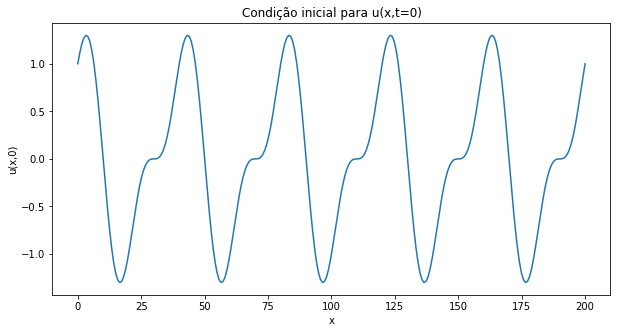

1.0 0.9999999999999988


In [5]:
# condição inicial 
u0 = np.cos((np.pi*x_grid)/20)*(1 + np.sin((np.pi*x_grid)/20))

plt.figure(figsize=(10,5))
plt.title('Condição inicial para u(x,t=0)')
plt.plot(x_grid, u0)
plt.ylabel('u(x,0)')
plt.xlabel('x')
plt.show()

print(u0[0], u0[-1])

## Discretizando o termo $u_x$ da equação para condição inicial

Para discretizar utilizou-se a solução do método de diferenças finitas compactas do artigo (BHATT & CHOWDHURY, 2019) para a derivada de primeira ordem.

\begin{equation}
    u'_{i-1} + 4u'_{i} +u'_{i+1} = \frac{3}{h}(u_{i+1} - u_{i-1})
\end{equation}

In [6]:
A = np.zeros((N,N))
i,j = np.indices(A.shape, dtype=int)

A[i==j-1] = 1
A[i==j] = 4
A[i==j+1] = 1

A[0,-1] = A[0,1]
A[-1,0] = A[-1,-2]


A2 = np.linalg.inv(A)

A

array([[4., 1., 0., ..., 0., 0., 1.],
       [1., 4., 1., ..., 0., 0., 0.],
       [0., 1., 4., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 4., 1., 0.],
       [0., 0., 0., ..., 1., 4., 1.],
       [1., 0., 0., ..., 0., 1., 4.]])

In [7]:
matrixpsi = np.zeros((N,N))
i,j = np.indices(matrixpsi.shape, dtype=int)

c1 = 3/(delta_x)

matrixpsi[i==j-1] = c1*1
matrixpsi[i==j+1] = c1*-1

matrixpsi[0,-1] = -1
matrixpsi[-1,0] = 1

matrixpsi

array([[ 0.   ,  3.825,  0.   , ...,  0.   ,  0.   , -1.   ],
       [-3.825,  0.   ,  3.825, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , -3.825,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  3.825,  0.   ],
       [ 0.   ,  0.   ,  0.   , ..., -3.825,  0.   ,  3.825],
       [ 1.   ,  0.   ,  0.   , ...,  0.   , -3.825,  0.   ]])

## Discretizando o termo $u_{xx}$ da equação para condição inicial

Discretizando o termo da derivada de segunda ordem através do método de diferenças finitas compactas do artigo (BHATT & CHOWDHURY, 2019)

\begin{equation}
    u''_{i-1} +10u''_i + u''_{i+1} = \frac{12}{h^2}(u_{i-1} - 2u_i + u_{i+1})
\end{equation}


In [8]:
B = np.zeros((N,N))
i,j = np.indices(B.shape, dtype=int)

B[i==j-1] = 1
B[i==j] = 10
B[i==j+1] = 1

B[0,-1] = B[0,1]
B[-1,0] = B[-1,-2]

B2 = np.linalg.inv(B)

B

array([[10.,  1.,  0., ...,  0.,  0.,  1.],
       [ 1., 10.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 10.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., 10.,  1.],
       [ 1.,  0.,  0., ...,  0.,  1., 10.]])

In [9]:
matrixphi = np.zeros((N,N))
i,j = np.indices(matrixphi.shape, dtype=int)

c2 = 12/(delta_x**2)

matrixphi[i==j+1] = c2
matrixphi[i==j] = c2*-2
matrixphi[i==j-1] = c2

matrixphi[0,-1] = matrixphi[0,1]
matrixphi[-1,0] = matrixphi[-1,-2]


matrixphi

array([[-39.015 ,  19.5075,   0.    , ...,   0.    ,   0.    ,  19.5075],
       [ 19.5075, -39.015 ,  19.5075, ...,   0.    ,   0.    ,   0.    ],
       [  0.    ,  19.5075, -39.015 , ...,   0.    ,   0.    ,   0.    ],
       ...,
       [  0.    ,   0.    ,   0.    , ..., -39.015 ,  19.5075,   0.    ],
       [  0.    ,   0.    ,   0.    , ...,  19.5075, -39.015 ,  19.5075],
       [ 19.5075,   0.    ,   0.    , ...,   0.    ,  19.5075, -39.015 ]])

## Discretizando o termo $u_{xxxx}$ da equação para condição inicial

Para discretizar o termo com a derivada de quarta ordem foi substituído na equação:

\begin{equation}
    u''_{i-1} +10u''_i + u''_{i+1} = \frac{12}{h^2}(u_{i-1} - 2u_i + u_{i+1})
\end{equation}

o termo $u$ para $u''$, ficando assim:

\begin{equation}
    u''''_{i-1} +10u''''_i + u''''_{i+1} = \frac{12}{h^2}(u''_{i-1} - 2u''_i + u''_{i+1})
\end{equation}



## Definindo as funções

In [10]:
def u_x(u):
    psi = np.matmul(matrixpsi,u)
    u_x = np.matmul(A2,psi)
    return u_x

def u_xx(u):
    phi = np.matmul(matrixphi,u)
    u_xx = np.matmul(B2,phi)
    return u_xx

def u_xxxx(u):
    phi = np.matmul(matrixphi,u_xx(u))
    u_xxxx = np.matmul(B2,phi)
    return u_xxxx

def kuramoto(u):
    L = -np.multiply(u,u_x(u)) - alpha*u_xx(u) - gama*u_xxxx(u)
    return L

def SSP_RK43(u):
    u1 = u + (delta_t/2)*kuramoto(u)
    u2 = u1 + (delta_t/2)*kuramoto(u1)
    u3 = (2/3)*u + u2/3 + (delta_t/6)*kuramoto(u2)
    un = u3 + (delta_t/2)*kuramoto(u3)    
    return un

## Discretizando a equação de KS e obtendo os valores de $u(x,t)$ para os pontos dos grid em $x$ e $t$

In [11]:
u_final = np.zeros((t_grid.shape[0], N))
u_final[0,:] = u0

for i in range(t_grid.shape[0]-1):
      
    u_final[i+1,:] = SSP_RK43(u_final[i,:])

In [12]:
u_final.shape

(40001, 256)

In [13]:
print(u_final[0, 0])
print(u_final[0, -1])

1.0
0.9999999999999988


## Plotando os resultados

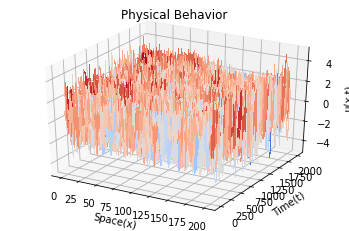

In [14]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X, T = np.meshgrid(x_grid, t_grid)

# Plot the surface.
ax.plot_surface(X, T, u_final[:,:], cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('Space(x)')
ax.set_ylabel('Time(t)')
ax.set_zlabel('u(x,t)')
plt.title('Physical Behavior')
plt.show()

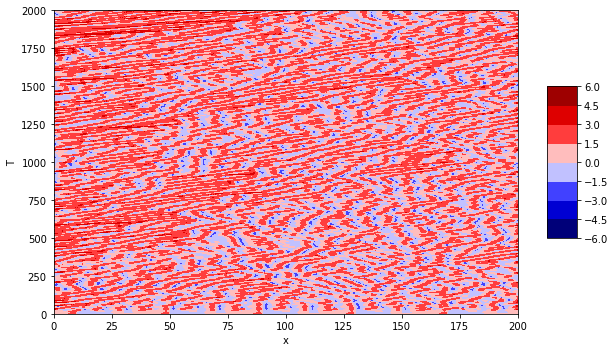

In [15]:
fig, ax = plt.subplots(figsize=(9, 5))

surf = ax.contourf(X, T, u_final, cmap=plt.get_cmap("seismic"))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('x')
plt.ylabel('t')
plt.tight_layout()

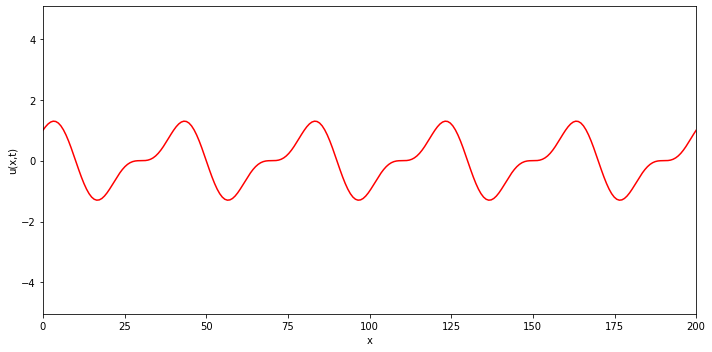

In [16]:
from matplotlib.animation import FuncAnimation
from IPython import display
from IPython.display import HTML

fig = plt.figure(figsize=(10, 5))
line = plt.plot(x_grid, u_final[0,:], 'r')[0]
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.xlim(0,200)
plt.ylim(u_final.min(),u_final.max())
fig.tight_layout()

In [17]:
def animate(i):
    fig.suptitle('Time step {:0>2}'.format(i*delta_t))

    line.set_ydata(u_final[i])
    return line

In [18]:
animation = FuncAnimation(fig, animate, frames=np.arange(0,t_grid.shape[0],500), interval=300) 
# video = animation.to_html5_video()
# html = display.HTML(video)
# display.display(html)
plt.close()

In [19]:
animation.save('animation.gif', writer='imagemagick', fps=2)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [20]:
X.shape

(40001, 256)

In [21]:
np.save('X.npy', X)
np.save('T.npy', T)
np.save('U.npy', u_final)